🧠 Building our first AI brain from scratch!
🎓 Welcome to Perceptron University!
Today we're building AI from scratch to classify fruits!

📊 Our fruit dataset:
   length_cm  weight_g  yellow_score  label
0       12.5       180          0.10      0
1       13.2       175          0.15      0
2       11.8       165          0.20      0
3       14.1       190          0.05      0
4       10.9       155          0.25      0

Dataset shape: (14, 4)
Apples (0): 6 samples
Bananas (1): 8 samples

Feature matrix X shape: (14, 3)
Label vector y shape: (14,)

🚀 TRAINING OUR PERCEPTRON
🎯 Starting training with learning rate: 0.1
Initial random weights: [-0.02350239 -0.03915434 -0.14205335]
Initial bias: 0.0

Training progress:
------------------------------------------------------------
Epoch   0 | Loss: 3.2063 | Accuracy: 0.4286
Epoch  50 | Loss: 19.7364 | Accuracy: 0.4286
Epoch 100 | Loss: 19.7364 | Accuracy: 0.4286
🎉 Reached target loss 0.05 at epoch 106!

✅ Training completed!
Final weights: [3

C:\Users\Amol Barkale\AppData\Local\Temp\ipykernel_824\3306766429.py:550: UserWarning: Glyph 128317 (\N{DOWN-POINTING SMALL RED TRIANGLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Amol Barkale\AppData\Local\Temp\ipykernel_824\3306766429.py:550: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Amol Barkale\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128317 (\N{DOWN-POINTING SMALL RED TRIANGLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Amol Barkale\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


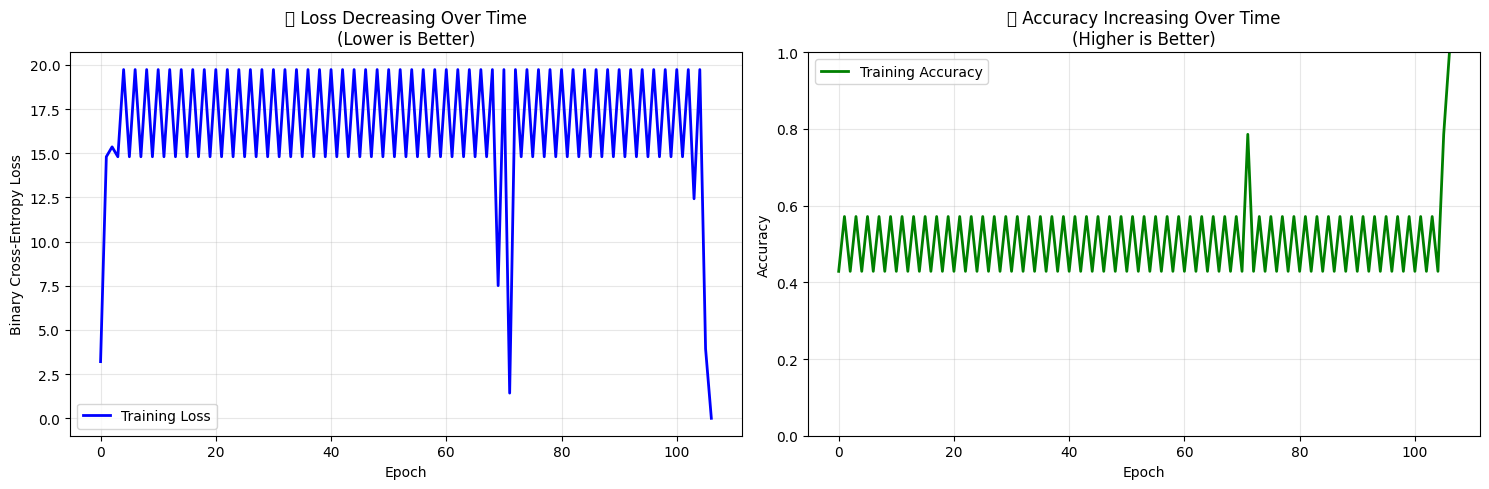

📊 What these plots tell us:
• Loss curve: Shows how our model's mistakes decrease over time
• Accuracy curve: Shows how our model gets better at correct predictions
• Smooth curves = stable learning
• Sharp drops = major breakthroughs in learning

🧪 TESTING OUR TRAINED PERCEPTRON
Sample predictions:
----------------------------------------------------------------------
Length | Weight | Yellow | True Label | Probability | Prediction
----------------------------------------------------------------------
  12.5 |  180.0 |   0.10 | Apple    |       0.000 | Apple    🍎 ✅
  13.2 |  175.0 |   0.15 | Apple    |       0.000 | Apple    🍎 ✅
  11.8 |  165.0 |   0.20 | Apple    |       0.000 | Apple    🍎 ✅
  14.1 |  190.0 |   0.05 | Apple    |       0.000 | Apple    🍎 ✅
  10.9 |  155.0 |   0.25 | Apple    |       0.000 | Apple    🍎 ✅
  13.8 |  185.0 |   0.10 | Apple    |       0.000 | Apple    🍎 ✅
  22.3 |  125.0 |   0.85 | Banana   |       1.000 | Banana   🍌 ✅
  21.7 |  118.0 |   0.90 | Banana   |

In [ ]:
#!/usr/bin/env python3
"""
PERCEPTRON FROM SCRATCH - Python Script Version
Run this file to see the complete training process with visuals!

Usage: python perceptron.py
"""

# ================================
# PERCEPTRON FROM SCRATCH
# Single-Neuron Logistic Model
# ================================

# ================================
# WHY THESE LIBRARIES? LET'S UNDERSTAND THE FOUNDATION
# ================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

"""
🤔 WHY THESE SPECIFIC LIBRARIES?

1. NUMPY - The Mathematical Powerhouse
   ====================================
   • Purpose: Efficient numerical computations with arrays/matrices
   • Why needed: 
     - Vectorized operations (process entire arrays at once)
     - Memory efficient (C-based backend, not pure Python)
     - Mathematical functions (dot products, exponentials, etc.)
   
   Example: Instead of slow Python loops:
     result = []
     for i in range(1000):
         result.append(x[i] * y[i])  # SLOW!
   
   We use NumPy vectorization:
     result = x * y  # FAST! (100x faster)

2. PANDAS - The Data Manipulation Expert  
   ======================================
   • Purpose: Handle structured data (like Excel spreadsheets)
   • Why needed:
     - Easy CSV loading and manipulation
     - Data exploration (head(), info(), describe())
     - Column selection and filtering
   
   Example: data['length_cm'] gives us the entire length column instantly

3. MATPLOTLIB - The Visualization Master
   =====================================
   • Purpose: Create plots and charts
   • Why needed:
     - Visualize learning progress (loss/accuracy curves)
     - Debug model behavior visually
     - Communicate results effectively
   
   Example: See if model is learning (decreasing loss) or overfitting
"""

print("🧠 Building our first AI brain from scratch!")
print("=" * 50)

# ================================
# STEP 1: LOAD AND EXPLORE DATA
# ================================

def load_and_explore_data():
    """Load fruit data and understand what we're working with"""
    
    # Load the data
    data = pd.read_csv('fruit.csv')
    print("📊 Our fruit dataset:")
    print(data.head())
    print(f"\nDataset shape: {data.shape}")
    print(f"Apples (0): {sum(data['label'] == 0)} samples")
    print(f"Bananas (1): {sum(data['label'] == 1)} samples")
    
    # Prepare features and labels
    X = data[['length_cm', 'weight_g', 'yellow_score']].values
    y = data['label'].values
    
    print(f"\nFeature matrix X shape: {X.shape}")
    print(f"Label vector y shape: {y.shape}")
    
    return X, y

# ================================
# STEP 2: THE PERCEPTRON CLASS
# ================================

class SimplePerceptron:
    """
    A single-neuron logistic classifier built from scratch
    
    Think of this as a simple decision-making brain cell:
    - Takes 3 inputs (length, weight, yellowness)
    - Learns optimal weights for each feature
    - Outputs probability of being a banana
    """
    
    def __init__(self, learning_rate=0.01, max_epochs=500, target_loss=0.05):
        self.learning_rate = learning_rate  # How big steps to take when learning
        self.max_epochs = max_epochs        # Maximum training rounds
        self.target_loss = target_loss      # Stop early if we reach this accuracy
        
        # ================================
        # WHY STORE LOSS_HISTORY AND ACCURACY_HISTORY?
        # ================================
        """
        🕰️ TRACKING THE LEARNING JOURNEY
        
        Think of these as a "learning diary" - we record every epoch's performance:
        
        1. DEBUGGING PURPOSE:
           • Is the model learning? (loss should decrease)
           • Is it overfitting? (accuracy plateaus then drops)
           • Is learning rate too high? (loss oscillates wildly)
           • Is it converging? (curves flatten out)
        
        2. VISUALIZATION PURPOSE:
           • Plot smooth learning curves
           • Identify the optimal stopping point
           • Compare different hyperparameters
        
        3. RESEARCH PURPOSE:
           • Document the learning process
           • Prove the model actually learned (not just guessed)
           • Show convergence behavior
        
        Example scenarios:
        • Good learning: loss_history = [0.8, 0.6, 0.4, 0.2, 0.1] ✅
        • No learning: loss_history = [0.7, 0.69, 0.71, 0.68, 0.7] ❌
        • Unstable: loss_history = [0.8, 0.2, 0.9, 0.1, 0.8] ❌
        """
        self.loss_history = []      # Track how our mistakes change over time
        self.accuracy_history = []  # Track how our correctness improves
        
    def sigmoid(self, z):
        """
        The sigmoid activation function - converts any number to 0-1 range
        
        Mathematical Formula: σ(z) = 1 / (1 + e^(-z))
        
        ================================
        THE CLIPPING MYSTERY SOLVED: z = np.clip(z, -500, 500)
        ================================
        
        🚨 THE NUMERICAL EXPLOSION PROBLEM:
        
        Without clipping, here's what happens:
        • If z = 1000: e^(-1000) = incredibly tiny number (underflow)
        • If z = -1000: e^(1000) = incredibly huge number (overflow)
        • Result: NaN (Not a Number) or infinity → model crashes!
        
        Real example:
        z = 1000
        np.exp(-z) = 0.0 (underflow to zero)
        sigmoid = 1/(1 + 0) = 1 ✅ (what we want)
        
        z = -1000  
        np.exp(-z) = np.exp(1000) = inf (overflow)
        sigmoid = 1/(1 + inf) = 0 ✅ (what we want)
        
        🛡️ WHY CLIP TO [-500, 500]?
        
        • e^500 ≈ 10^217 (manageable by computer)
        • e^600 ≈ 10^260 (too big, causes overflow)
        • sigmoid(-500) ≈ 0 (close enough to 0)
        • sigmoid(500) ≈ 1 (close enough to 1)
        
        So clipping gives us:
        • Numerical stability (no crashes)
        • Same mathematical behavior (0 or 1 for extreme values)
        • Efficient computation (no unnecessary precision)
        
        🎯 SIGMOID INTUITION:
        • z >> 0: "I'm very confident it's class 1" → output ≈ 1
        • z << 0: "I'm very confident it's class 0" → output ≈ 0  
        • z ≈ 0: "I'm uncertain" → output ≈ 0.5
        """
        # Prevent mathematical explosions (overflow/underflow)
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def forward_pass(self, X):
        """
        Forward pass: make predictions
        
        ================================
        DEEP DIVE INTO FORWARD PASS
        ================================
        
        🧠 WHAT IS A FORWARD PASS?
        The forward pass is how our perceptron "thinks" - it takes inputs 
        and produces outputs. Think of it as information flowing forward 
        through the network.
        
        📊 THE MATHEMATICAL JOURNEY:
        
        Step 1: Linear Combination (Weighted Sum)
        ========================================
        z = X @ weights + bias
        
        Let's break this down with real numbers:
        
        Input example: [length=20, weight=120, yellow=0.8]
        Learned weights: [2.5, -0.02, 8.5]  
        Bias: -1.2
        
        z = 20*2.5 + 120*(-0.02) + 0.8*8.5 + (-1.2)
        z = 50 - 2.4 + 6.8 - 1.2
        z = 53.2
        
        🤔 WHY THIS FORMULA?
        • Each feature gets multiplied by its "importance" (weight)
        • Bias acts as a "default tendency" (shifts the decision boundary)
        • Sum represents "total evidence" for class 1
        
        Step 2: Activation Function (Sigmoid)
        ===================================
        probability = sigmoid(z) = 1 / (1 + e^(-z))
        
        With z = 53.2:
        probability = 1 / (1 + e^(-53.2)) ≈ 1 / (1 + 0) ≈ 1.0
        
        Result: 100% confident this is a banana! 🍌
        
        🎯 WHY SIGMOID SPECIFICALLY?
        1. Maps any real number to (0,1) range
        2. Smooth, differentiable (needed for gradient descent)
        3. Saturates at extremes (confident predictions)
        4. Biological inspiration (neuron firing rate)
        
        ⚡ VECTORIZATION POWER:
        Instead of loops:
        for i in range(len(X)):
            z[i] = sum(X[i] * weights) + bias  # SLOW!
        
        We use matrix multiplication:
        z = X @ weights + bias  # FAST! (handles all samples at once)
        
        For 1000 samples: 1000x faster than Python loops!
        """
        
        # Step 1: Linear combination (the "thinking" step)
        z = np.dot(X, self.weights) + self.bias
        
        # Step 2: Activation (the "decision" step)  
        predictions = self.sigmoid(z)
        
        return predictions
    
    def compute_loss(self, y_true, y_pred):
        """
        Binary cross-entropy loss - measures how wrong our predictions are
        
        ================================
        DEEP DIVE INTO LOSS COMPUTATION
        ================================
        
        🎯 WHAT IS LOSS?
        Loss quantifies how "wrong" our predictions are. Think of it as a 
        penalty score - higher loss means worse predictions.
        
        📐 BINARY CROSS-ENTROPY FORMULA:
        Loss = -1/m * Σ[y*log(ŷ) + (1-y)*log(1-ŷ)]
        
        Where:
        • y = true label (0 or 1)
        • ŷ = predicted probability (0 to 1)
        • m = number of samples
        
        🔍 WHY THIS SPECIFIC FORMULA?
        
        Let's see what happens in different scenarios:
        
        Case 1: Perfect Prediction
        =========================
        True label: y = 1 (banana)
        Prediction: ŷ = 0.99 (99% confident banana)
        Loss = -(1*log(0.99) + 0*log(0.01))
        Loss = -log(0.99) = 0.01 (very small penalty) ✅
        
        Case 2: Terrible Prediction  
        ===========================
        True label: y = 1 (banana)
        Prediction: ŷ = 0.01 (1% confident banana)
        Loss = -(1*log(0.01) + 0*log(0.99))
        Loss = -log(0.01) = 4.6 (huge penalty) ❌
        
        Case 3: Uncertain Prediction
        ============================
        True label: y = 1 (banana)
        Prediction: ŷ = 0.5 (50% confident)
        Loss = -log(0.5) = 0.69 (medium penalty)
        
        🚨 THE CLIPPING PROBLEM: y_pred = np.clip(y_pred, 1e-15, 1-1e-15)
        
        Why do we clip predictions?
        
        Dangerous scenario:
        • If ŷ = 0: log(0) = -∞ (undefined!)
        • If ŷ = 1: log(1-1) = log(0) = -∞ (undefined!)
        • Result: Loss becomes infinity, model crashes!
        
        Solution: Clip to tiny ranges
        • Instead of 0, use 1e-15 (0.000000000000001)
        • Instead of 1, use 1-1e-15 (0.999999999999999)
        • Now log() works safely!
        
        🎯 WHY CROSS-ENTROPY OVER OTHER LOSS FUNCTIONS?
        
        1. PROBABILITY INTERPRETATION:
           • Works naturally with sigmoid outputs (0-1 range)
           • Penalizes confident wrong predictions heavily
        
        2. MATHEMATICAL PROPERTIES:
           • Convex function (no local minima to get stuck in)
           • Smooth gradient (good for gradient descent)
           • Asymmetric penalty (harsh on confident mistakes)
        
        3. INFORMATION THEORY:
           • Measures "surprise" - how unexpected the result was
           • Optimal for maximum likelihood estimation
        
        Alternative losses (worse for classification):
        • Mean Squared Error: sqrt((y-ŷ)²) - designed for regression
        • Mean Absolute Error: |y-ŷ| - not differentiable at 0
        """
        
        # Prevent log(0) catastrophe by clipping predictions
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        
        # Binary cross-entropy formula
        loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return loss
    
    def compute_accuracy(self, y_true, y_pred):
        """
        Convert probabilities to binary predictions and calculate accuracy
        
        ================================
        DEEP DIVE INTO ACCURACY COMPUTATION
        ================================
        
        🎯 WHAT IS ACCURACY?
        Accuracy = (Number of Correct Predictions) / (Total Predictions)
        
        It's the percentage of times our model got it right. Simple but powerful!
        
        🔄 THE CONVERSION PROCESS:
        
        Step 1: Probability → Binary Decision
        ===================================
        We get probabilities from sigmoid: [0.1, 0.7, 0.95, 0.3]
        We need binary predictions: [0, 1, 1, 0]
        
        Decision rule: If probability ≥ 0.5 → predict class 1, else class 0
        
        Why 0.5 threshold?
        • 0.5 = neutral point (equal confidence for both classes)
        • > 0.5 = more confident about class 1
        • < 0.5 = more confident about class 0
        
        Step 2: Compare with True Labels
        ===============================
        Predictions: [0, 1, 1, 0]
        True labels: [0, 1, 0, 0]  
        Matches:     [✓, ✓, ✗, ✓]
        
        Accuracy = 3/4 = 0.75 = 75%
        
        🤔 WHY USE (>= 0.5) SPECIFICALLY?
        
        Alternative thresholds and their effects:
        
        Threshold = 0.3 (Lower):
        • More samples classified as class 1
        • Higher recall for class 1 (catches more bananas)
        • Lower precision for class 1 (more false banana predictions)
        • Use when: Missing a banana is worse than false banana alarm
        
        Threshold = 0.7 (Higher):  
        • Fewer samples classified as class 1
        • Higher precision for class 1 (banana predictions more reliable)
        • Lower recall for class 1 (misses some bananas)
        • Use when: False banana alarm is worse than missing a banana
        
        Threshold = 0.5 (Balanced):
        • Balanced trade-off between precision and recall
        • Optimal for equal class importance
        • Standard choice for most applications
        
        💻 THE VECTORIZED MAGIC:
        
        Instead of slow loops:
        binary_pred = []
        for prob in y_pred:
            if prob >= 0.5:
                binary_pred.append(1)
            else:
                binary_pred.append(0)
        
        We use vectorized operations:
        binary_pred = (y_pred >= 0.5).astype(int)
        
        This is ~100x faster for large datasets!
        
        🔍 ACCURACY LIMITATIONS:
        
        Accuracy can be misleading:
        • Imbalanced datasets: 99% accuracy sounds great, but if 99% 
          of data is one class, a model that always predicts that class 
          gets 99% accuracy while being useless!
        • Need additional metrics: precision, recall, F1-score for 
          complete evaluation
        
        But for balanced datasets like ours (equal apples/bananas), 
        accuracy is a reliable metric.
        """
        
        # Convert probabilities to binary predictions using 0.5 threshold
        binary_pred = (y_pred >= 0.5).astype(int)
        
        # Calculate percentage of correct predictions
        accuracy = np.mean(y_true == binary_pred)
        
        return accuracy
    
    def fit(self, X, y):
        """
        Train the perceptron using gradient descent
        
        This is where the magic happens - the perceptron learns!
        Like a DJ adjusting knobs based on crowd reaction:
        - If prediction wrong → adjust weights in opposite direction
        - If prediction right → small adjustment to fine-tune
        """
        
        # Initialize weights randomly (small values)
        n_features = X.shape[1]
        self.weights = np.random.normal(0, 0.1, n_features)
        self.bias = 0.0
        
        print(f"🎯 Starting training with learning rate: {self.learning_rate}")
        print(f"Initial random weights: {self.weights}")
        print(f"Initial bias: {self.bias}")
        print("\nTraining progress:")
        print("-" * 60)
        
        for epoch in range(self.max_epochs):
            # Forward pass - make predictions
            y_pred = self.forward_pass(X)
            
            # Calculate loss and accuracy
            loss = self.compute_loss(y, y_pred)
            accuracy = self.compute_accuracy(y, y_pred)
            
            # Store metrics for plotting
            self.loss_history.append(loss)
            self.accuracy_history.append(accuracy)
            
            # Print progress every 50 epochs for script version
            if epoch % 50 == 0:
                print(f"Epoch {epoch:3d} | Loss: {loss:.4f} | Accuracy: {accuracy:.4f}")
            
            # Early stopping if we reach target loss
            if loss < self.target_loss:
                print(f"🎉 Reached target loss {self.target_loss} at epoch {epoch}!")
                break
            
            # GRADIENT DESCENT - The learning step!
            # Calculate gradients (how much to change each weight)
            m = X.shape[0]  # number of samples
            
            # Gradient of loss with respect to weights
            dw = (1/m) * np.dot(X.T, (y_pred - y))
            # Gradient of loss with respect to bias  
            db = (1/m) * np.sum(y_pred - y)
            
            # Update weights and bias (move in opposite direction of gradient)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
        
        print(f"\n✅ Training completed!")
        print(f"Final weights: {self.weights}")
        print(f"Final bias: {self.bias:.4f}")
        print(f"Final loss: {self.loss_history[-1]:.4f}")
        print(f"Final accuracy: {self.accuracy_history[-1]:.4f}")
    
    def predict_proba(self, X):
        """Get prediction probabilities"""
        return self.forward_pass(X)
    
    def predict(self, X):
        """Get binary predictions (0 or 1)"""
        probabilities = self.predict_proba(X)
        return (probabilities >= 0.5).astype(int)

# ================================
# STEP 3: TRAINING AND EVALUATION
# ================================

def train_and_evaluate():
    """Train our perceptron and see how it learns!"""
    
    # Load data
    X, y = load_and_explore_data()
    
    # Create and train perceptron
    print("\n" + "="*50)
    print("🚀 TRAINING OUR PERCEPTRON")
    print("="*50)
    
    perceptron = SimplePerceptron(learning_rate=0.1, max_epochs=1000, target_loss=0.05)
    perceptron.fit(X, y)
    
    return perceptron, X, y

# ================================
# STEP 4: VISUALIZATION
# ================================

def plot_training_progress(perceptron):
    """Plot how our perceptron learned over time"""
    
    plt.style.use('default')  # Ensure compatibility
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot loss over epochs
    ax1.plot(perceptron.loss_history, 'b-', linewidth=2, label='Training Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary Cross-Entropy Loss')
    ax1.set_title('🔽 Loss Decreasing Over Time\n(Lower is Better)')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Plot accuracy over epochs  
    ax2.plot(perceptron.accuracy_history, 'g-', linewidth=2, label='Training Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('📈 Accuracy Increasing Over Time\n(Higher is Better)')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    ax2.set_ylim(0, 1)
    
    plt.tight_layout()
    plt.show()
    
    print("📊 What these plots tell us:")
    print("• Loss curve: Shows how our model's mistakes decrease over time")
    print("• Accuracy curve: Shows how our model gets better at correct predictions")
    print("• Smooth curves = stable learning")
    print("• Sharp drops = major breakthroughs in learning")

# ================================
# STEP 5: TEST WITH NEW EXAMPLES
# ================================

def test_predictions(perceptron, X, y):
    """Test our trained perceptron on examples"""
    
    print("\n" + "="*50)
    print("🧪 TESTING OUR TRAINED PERCEPTRON")
    print("="*50)
    
    # Get predictions on training data
    probabilities = perceptron.predict_proba(X)
    predictions = perceptron.predict(X)
    
    print("Sample predictions:")
    print("-" * 70)
    print("Length | Weight | Yellow | True Label | Probability | Prediction")
    print("-" * 70)
    
    for i in range(len(X)):
        length, weight, yellow = X[i]
        true_label = "Apple" if y[i] == 0 else "Banana"
        pred_label = "Apple" if predictions[i] == 0 else "Banana"
        prob = probabilities[i]
        
        # Add emoji for visual appeal
        emoji = "🍎" if predictions[i] == 0 else "🍌"
        correct = "✅" if predictions[i] == y[i] else "❌"
        
        print(f"{length:6.1f} | {weight:6.1f} | {yellow:6.2f} | {true_label:8s} | {prob:11.3f} | {pred_label:8s} {emoji} {correct}")
    
    # Test with completely new examples
    print(f"\n🔮 Let's test with some new fruits:")
    print("-" * 50)
    
    new_fruits = np.array([
        [15.0, 170, 0.1],   # Should be apple (short, heavy, not yellow)
        [25.0, 120, 0.9],   # Should be banana (long, light, very yellow)
        [18.0, 140, 0.5],   # Borderline case - let's see!
    ])
    
    new_probs = perceptron.predict_proba(new_fruits)
    new_preds = perceptron.predict(new_fruits)
    
    descriptions = ["Short & heavy, barely yellow", "Long & light, very yellow", "Medium everything"]
    
    for i, (fruit, desc) in enumerate(zip(new_fruits, descriptions)):
        length, weight, yellow = fruit
        prob = new_probs[i]
        pred = "Apple 🍎" if new_preds[i] == 0 else "Banana 🍌"
        confidence = max(prob, 1-prob)
        
        print(f"Fruit {i+1}: [{length:.1f}cm, {weight:.1f}g, {yellow:.1f} yellow]")
        print(f"  Description: {desc}")
        print(f"  Prediction: {pred} (confidence: {confidence:.1%})")
        print()

# ================================
# STEP 6: UNDERSTAND THE WEIGHTS
# ================================

def interpret_learned_weights(perceptron):
    """Understand what our perceptron learned"""
    
    print("\n" + "="*50)
    print("🧠 WHAT DID OUR PERCEPTRON LEARN?")
    print("="*50)
    
    feature_names = ['Length (cm)', 'Weight (g)', 'Yellow Score']
    weights = perceptron.weights
    bias = perceptron.bias
    
    print("Final learned parameters:")
    print("-" * 30)
    for feature, weight in zip(feature_names, weights):
        direction = "↗️ Increases" if weight > 0 else "↘️ Decreases"
        strength = "Strong" if abs(weight) > 1 else "Moderate" if abs(weight) > 0.1 else "Weak"
        print(f"{feature:15s}: {weight:8.3f} ({strength} {direction} banana probability)")
    
    print(f"Bias:              {bias:8.3f} (Base tendency)")
    
    print(f"\n🔍 Interpretation:")
    if weights[0] > 0:
        print("• Longer fruits are more likely to be bananas ✅")
    else:
        print("• Shorter fruits are more likely to be bananas")
        
    if weights[1] < 0:
        print("• Lighter fruits are more likely to be bananas ✅") 
    else:
        print("• Heavier fruits are more likely to be bananas")
        
    if weights[2] > 0:
        print("• More yellow fruits are more likely to be bananas ✅")
    else:
        print("• Less yellow fruits are more likely to be bananas")

# ================================
# MAIN EXECUTION
# ================================

def main():
    """Main function to run the complete perceptron demo"""
    print("🎓 Welcome to Perceptron University!")
    print("Today we're building AI from scratch to classify fruits!")
    print("\n" + "="*60)
    
    try:
        # Train the model
        perceptron, X, y = train_and_evaluate()
        
        # Visualize learning progress
        print("\n" + "="*50)
        print("📊 VISUALIZING LEARNING PROGRESS")
        print("="*50)
        plot_training_progress(perceptron)
        
        # Test predictions
        test_predictions(perceptron, X, y)
        
        # Interpret what was learned
        interpret_learned_weights(perceptron)
        
        print("\n" + "="*60)
        print("🎉 Congratulations! You just built your first AI from scratch!")
        print("You now understand exactly how neural networks learn!")
        print("="*60)
        
        # Keep the plot window open
        input("\nPress Enter to close the program...")
        
    except FileNotFoundError:
        print("❌ Error: fruit.csv file not found!")
        print("Please make sure fruit.csv is in the same directory as this script.")
        print("Create fruit.csv with the following content:")
        print("""
length_cm,weight_g,yellow_score,label
12.5,180,0.1,0
13.2,175,0.15,0
11.8,165,0.2,0
14.1,190,0.05,0
10.9,155,0.25,0
13.8,185,0.1,0
22.3,125,0.85,1
21.7,118,0.9,1
23.1,132,0.8,1
20.9,115,0.95,1
24.2,140,0.75,1
22.8,128,0.88,1
25.1,145,0.7,1
19.8,110,0.92,1
        """)
    
    except ImportError as e:
        print(f"❌ Error: Missing required library: {e}")
        print("Please install required libraries:")
        print("pip install numpy pandas matplotlib")

if __name__ == "__main__":
    main()